<h1>The Adult Income dataset</h1>

<h2>Description</h2>


<h3>Title of dataset: adult.csv</h3>

<b>Sources</b>:

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

<b>Number of Instances</b>:

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

<b>Number of Attributes/Fearures/Columns</b>:

* 6 continuous, 8 nominal attributes. 

<b>Attribute Information/Fearures/Columns</b>

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

<b>Missing Values</b>:

 * 7% rows have missing values. 

In [35]:
# imporing all libraries which are required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
# reading the dataset
missing=['?']
df=pd.read_csv('adult.csv',na_values=missing)

In [37]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [38]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [39]:
df['income'].astype('category').value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [40]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [41]:
df[df.isnull().sum(axis=1) >=3]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,NaN,243190,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,30,NaN,<=50K
2323,50,NaN,339547,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,50,NaN,<=50K
2584,47,NaN,163748,Masters,14,Divorced,NaN,Unmarried,White,Female,0,0,35,NaN,<=50K
2612,27,NaN,258231,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,35,NaN,<=50K
2774,27,NaN,132372,HS-grad,9,Never-married,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K
3074,23,NaN,264874,Assoc-voc,11,Never-married,NaN,Other-relative,White,Female,0,0,40,NaN,<=50K
3671,24,NaN,35633,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,11,NaN,<=50K
3853,28,NaN,195568,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,15,NaN,>50K
5052,21,NaN,156780,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,15,NaN,<=50K
5972,40,NaN,95049,Assoc-voc,11,Separated,NaN,Own-child,White,Female,0,0,40,NaN,<=50K


In [42]:
df=df.dropna(how='any')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## Data Prepration


In [44]:
df.drop('fnlwgt', axis=1, inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [45]:
df.drop('educational-num', axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   marital-status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   gender          45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
 11  native-country  45222 non-null  object
 12  income          45222 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


In [47]:
cat= df.select_dtypes(include=['object'])
cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [48]:
num = df.select_dtypes(include=['int64' ,  'float64'])
num.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30


In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_num = pd.DataFrame(ss.fit_transform(num), 
                      columns = num.columns)
df_num.head()

,age,capital-gain,capital-loss,hours-per-week
0,-1.024983,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.146733,-0.21878,0.754701
2,-0.798015,-0.146733,-0.21878,-0.078120
3,0.412481,0.877467,-0.21878,-0.078120
4,-0.344079,-0.146733,-0.21878,-0.910942


In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
df_cat = pd.DataFrame(encoder.fit_transform(cat), 
                      columns=encoder.get_feature_names(cat.columns))
df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
y = df.pop('income_>50K')
X = df

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=30)

In [54]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31655, 94) (31655,)
(13567, 94) (13567,)


In [55]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[ 0.31624855  2.39146947  0.26359281  0.33731729 -0.62605848 -0.47131702
  -0.28736875 -1.00603633 -0.75112903 -0.53827734  0.05389047  0.34029944
  -0.78245864 -0.42774166 -0.50917016 -0.51779767  1.35594564  1.14921015
   1.80044344  2.69430959  0.72886943  2.1183209  -1.05130199  2.58826867
   1.05322161  1.17815031  2.02169057  0.10843156 -0.40894063 -0.13459534
   0.23527711  0.05302494 -0.02593234  0.71577051 -1.08427221 -0.69101726
  -0.32923514 -0.84172095 -1.67237244  0.50074434  0.49657998  0.21328497
   0.50823852 -0.10201839  0.24181812 -0.53341385 -0.74417856  0.17035985
   1.08283305  0.57356908  0.1865177   0.3519555   0.35343287  0.66985231
   0.49473371 -0.13286171 -1.07881148  0.422944   -1.13366208 -0.23331808
  -0.09508236  0.66145594  0.73620208  0.5367226  -0.38462781 -0.47474887
   0.05343485  0.          0.08516422 -0.2568505  -0.27552616  0.19513015
   0.00305287  0.82976668  0.88929509 -0.07248365  0.07082184 -0.5837213
  -0.42349481 -0.16911664 -0.14843374 -

In [57]:
y_train_pred = logisticRegr.predict(X_train)

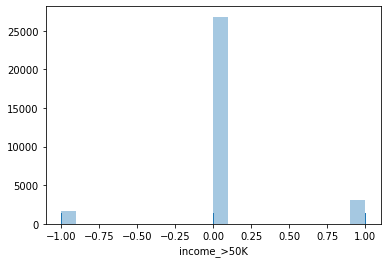

In [58]:
residual = y_train - y_train_pred

sns.distplot(residual, bins=20, kde=False, rug=True)

In [59]:
y_test_pred = logisticRegr.predict(X_test)

In [60]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
38210,0.0,0.0
34457,0.0,0.0
274,1.0,1.0
17637,0.0,0.0
30247,0.0,0.0


In [61]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.14807989975676272
Mean Squared Error:  0.14807989975676272
Root Mean Squared Error:  0.3848115119857548


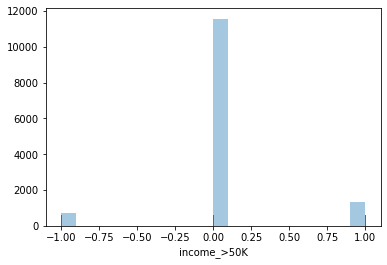

In [62]:
residual_test = y_test - y_test_pred

sns.distplot(residual_test, bins=20, kde=False, rug=True)

In [63]:
print(metrics.r2_score(y_test, y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.19767742385956322
0.8519201002432373


In [64]:
c_matrix = metrics.confusion_matrix(y_test,y_test_pred)
c_matrix

array([[9555,  699],
       [1310, 2003]], dtype=int64)

In [65]:
print(metrics.classification_report(y_test, y_test_pred))
# Number of features = 55

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10254
         1.0       0.74      0.60      0.67      3313

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567



# RFE

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()

In [67]:
rfe = RFE(lgr, 44)
rfe = rfe.fit(X_train, y_train)

In [68]:
temp_df = pd.DataFrame({"Columns" : X_train.columns, "Included" : rfe.support_, "Ranking" : rfe.ranking_})
temp_df


,Columns,Included,Ranking
0,age,False,6
1,capital-gain,True,1
2,capital-loss,False,14
3,hours-per-week,False,5
4,workclass_Local-gov,False,10
...,...,...,...
89,native-country_Thailand,True,1
90,native-country_Trinadad&Tobago,True,1
91,native-country_United-States,False,21
92,native-country_Vietnam,True,1


In [70]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['capital-gain', 'workclass_Self-emp-not-inc', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'gender_Male', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_England',
       'native-country_France', 'native-country_Guatemala',
       'native-country_Ireland', 'native-cou

In [71]:
X_train_new = df[imp_col]
X_train_new.head()

,capital-gain,workclass_Self-emp-not-inc,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,...,native-country_Italy,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_South,native-country_Thailand,native-country_Trinadad&Tobago,native-country_Vietnam,native-country_Yugoslavia
0,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.877467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:

df_train,df_test = train_test_split(df, train_size = 0.7, random_state = 42)
from sklearn.linear_model import LogisticRegression
regressor_new = LogisticRegression()
regressor_new.fit(X_train_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

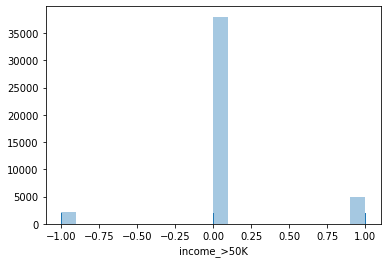

In [76]:
y_train_pred_new = regressor_new.predict(X_train_new)
residual = y - y_train_pred_new
sns.distplot(residual, bins=20, kde=False, rug=True)

In [78]:
X_test_new = df[imp_col]
y_test_pred_new = regressor_new.predict(X_test_new)

In [79]:
temp_df_new = pd.DataFrame({'Actual' : y, 'Predicted' : y_test_pred_new})
temp_df_new

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
45217,0.0,0.0
45218,1.0,0.0
45219,0.0,0.0
45220,0.0,0.0


In [80]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y, y_test_pred_new))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_test_pred_new))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y, y_test_pred_new)))

Mean Absolute Error:  0.15928088098713017
Mean Squared Error:  0.15928088098713017
Root Mean Squared Error:  0.39910008893400434


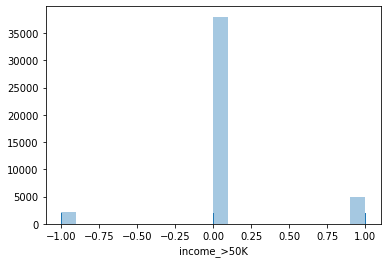

In [81]:
residual_test_new = y - y_test_pred_new
sns.distplot(residual_test_new, bins=20, kde=False, rug=True)

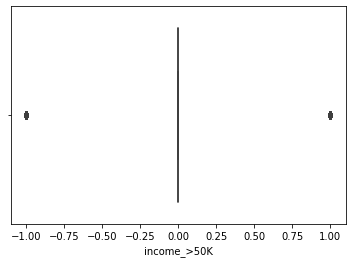

In [82]:
sns.boxplot(residual_test_new)

In [83]:
res_df = pd.DataFrame({'res_test' : residual_test, 'res_test_new': residual_test_new})
res_df.head()

,res_test,res_test_new
0,NaN,0.0
1,NaN,0.0
2,NaN,1.0
3,NaN,0.0
4,NaN,0.0


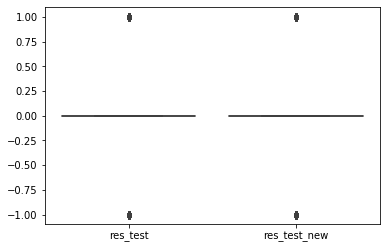

In [84]:
sns.boxplot(data = res_df)

In [85]:
print(metrics.r2_score(y, y_test_pred_new))
print(metrics.accuracy_score(y,y_test_pred_new))

0.1455683035918326
0.8407191190128699


In [86]:
print(metrics.classification_report(y, y_test_pred_new))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     34014
         1.0       0.74      0.55      0.63     11208

    accuracy                           0.84     45222
   macro avg       0.80      0.74      0.77     45222
weighted avg       0.83      0.84      0.83     45222



## PCA


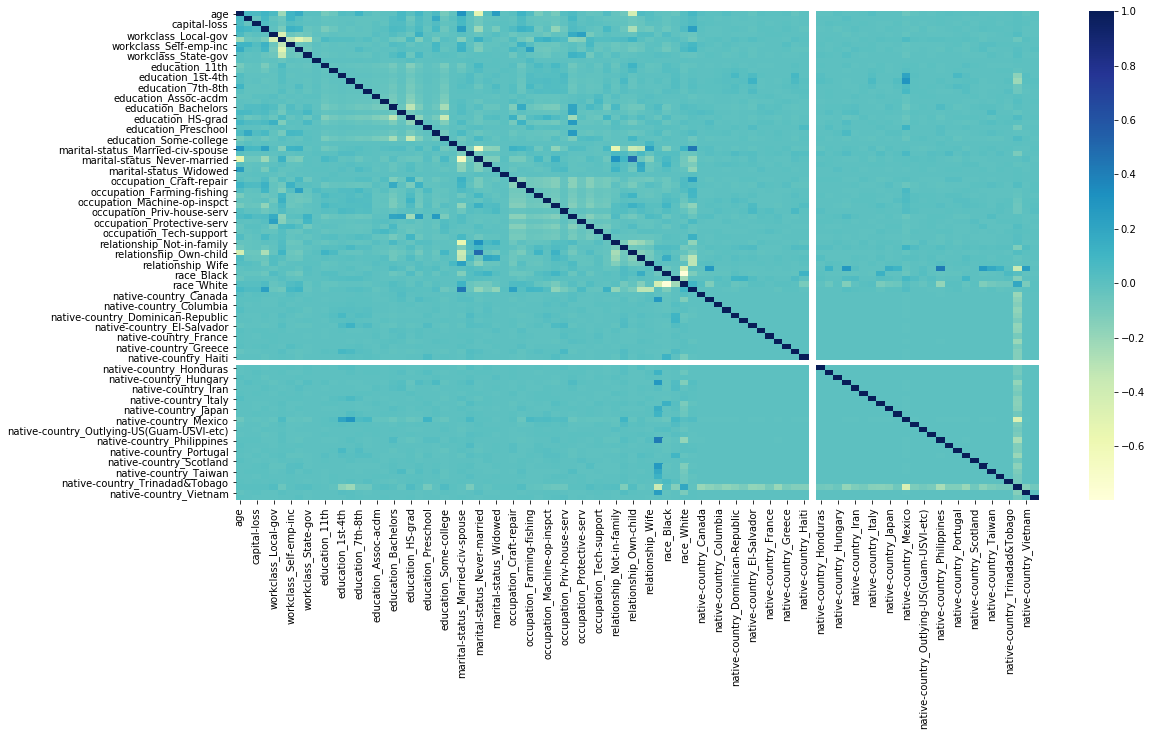

In [88]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")

In [89]:
X_train.shape

(31655, 94)

In [90]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [91]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

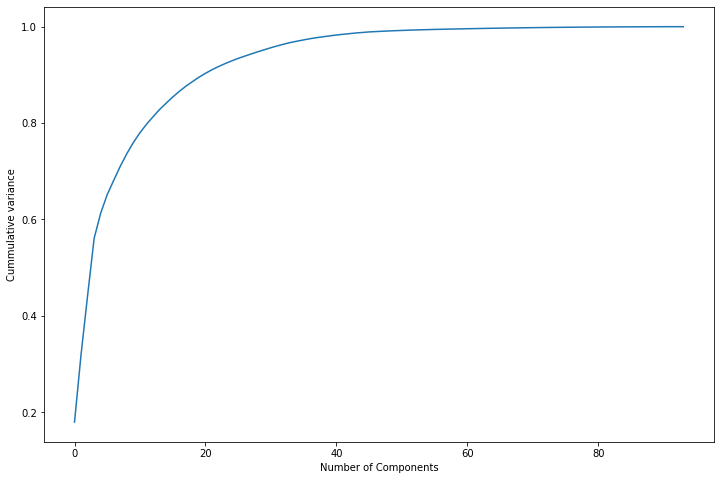

In [92]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [93]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17974054, 0.319989  , 0.44226809, 0.56093154, 0.613106  ,
       0.65168226, 0.68152268, 0.71061592, 0.73667515, 0.75988335,
       0.78004956, 0.79751901, 0.81320765, 0.8282627 , 0.84123497,
       0.85405389, 0.86568713, 0.87632077, 0.88585299, 0.89509382,
       0.90316837, 0.91061028, 0.91726551, 0.92332433, 0.92896339,
       0.93419831, 0.93888503, 0.9434436 , 0.94792533, 0.95218309,
       0.95636351, 0.96018914, 0.96385259, 0.96719479, 0.96993341,
       0.97256843, 0.97509367, 0.97722442, 0.97913604, 0.98096556,
       0.98271014, 0.98418346, 0.98556879, 0.98692731, 0.98804621,
       0.98913349, 0.98984938, 0.99049956, 0.99114435, 0.99171132,
       0.99221182, 0.99270893, 0.99315401, 0.99354384, 0.99392762,
       0.99428914, 0.99461248, 0.99492248, 0.99520601, 0.99548115,
       0.99575297, 0.99602085, 0.9962823 , 0.99653128, 0.99677248,
       0.99699507, 0.99720907, 0.99741752, 0.99761962, 0.99780956,
       0.99799169, 0.99816921, 0.99833481, 0.9984888 , 0.99862

In [94]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 44, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [95]:
X_train_pca.shape

(31655, 44)

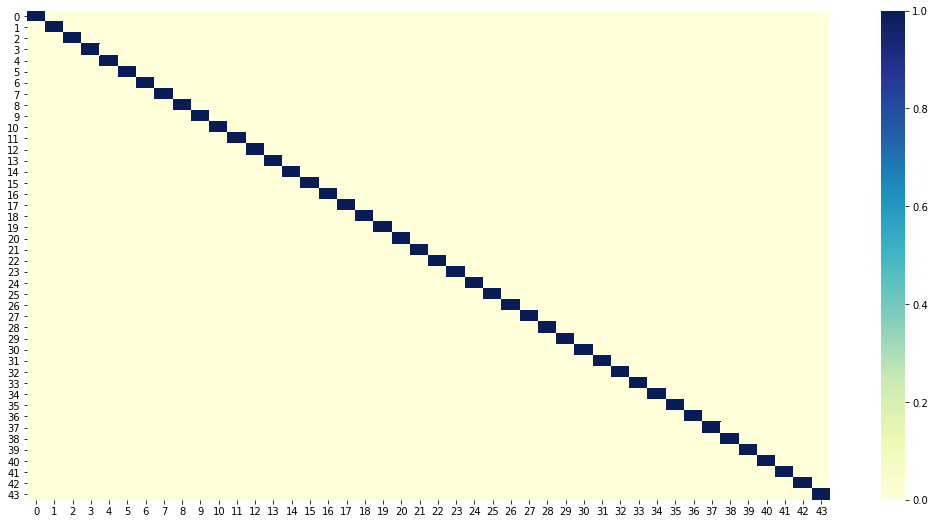

In [96]:
corrmat = np.corrcoef(X_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu")

In [97]:
X_test_pca = pca_final.transform(X_test)

In [98]:
from sklearn.linear_model import LogisticRegression

regressor_pca = LogisticRegression()

regressor_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
print(regressor_pca.coef_)

print(regressor_pca.intercept_)

[[ 2.27811729  1.4229853   0.99977603  0.50000133 -1.12421569 -0.95179862
  -0.15793506 -0.34786874 -1.12963373 -0.12165721 -0.92080613  0.38891583
   0.16134043 -0.46444628 -1.39235969 -0.61222657  0.24233943  0.07569332
   0.61266734 -1.01738775 -0.51436906 -0.31074205  0.23470474  0.47942429
   0.62263091  0.7092489   0.62513825  0.96867002  0.10586585 -0.8611966
  -0.03971211  0.92956394  0.12606143  0.57210622 -0.96007613  0.73010885
  -0.5130272  -0.28354503  1.31729713 -0.68956202  1.00213642 -2.04644673
   1.41408651 -0.44526127]]
[-1.8427412]


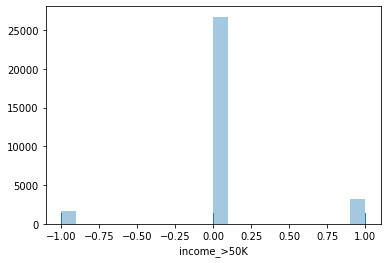

In [100]:
y_train_pred_pca = regressor_pca.predict(X_train_pca)

residual_pca = y_train - y_train_pred_pca

sns.distplot(residual_pca, bins=20, kde=False, rug=True)

In [101]:
y_test_pred_pca = regressor_pca.predict(X_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})

temp_df.head()

,Actual,Predicted
38210,0.0,0.0
34457,0.0,0.0
274,1.0,1.0
17637,0.0,0.0
30247,0.0,0.0


In [102]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_pca)))

Mean Absolute Error:  0.1474165253924965
Mean Squared Error:  0.1474165253924965
Root Mean Squared Error:  0.38394859733107045


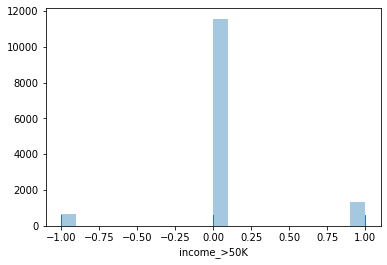

In [103]:
residual_test_pca = y_test - y_test_pred_pca

sns.distplot(residual_test_pca, bins=20, kde=False, rug=True)

In [104]:
print(metrics.r2_score(y_test, y_test_pred_pca))
print(metrics.accuracy_score(y_test,y_test_pred_pca))

0.2012717012041445
0.8525834746075035


In [105]:
print(metrics.classification_report(y_test, y_test_pred_pca))
# Number of features = 44

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     10254
         1.0       0.74      0.60      0.67      3313

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567



## KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
y_test_pred_knn = classifier.predict(X_test)

In [109]:
metrics.accuracy_score(y_test, y_test_pred_knn)

0.8363676568143289

In [110]:
metrics.confusion_matrix(y_test,y_test_pred_knn)

array([[9332,  922],
       [1298, 2015]], dtype=int64)

In [111]:
print(metrics.classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     10254
         1.0       0.69      0.61      0.64      3313

    accuracy                           0.84     13567
   macro avg       0.78      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567



## Decison Tree

In [115]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 100)
clf = clf.fit(X_train_pca , y_train)
y_test_pred_dt = clf.predict(X_test_pca)

In [117]:
metrics.accuracy_score(y_test , y_test_pred_dt)

0.8002506080931673

In [119]:
 metrics.confusion_matrix(y_test,y_test_pred_dt)

array([[8978, 1276],
       [1434, 1879]], dtype=int64)

In [120]:
print(metrics.classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10254
         1.0       0.60      0.57      0.58      3313

    accuracy                           0.80     13567
   macro avg       0.73      0.72      0.72     13567
weighted avg       0.80      0.80      0.80     13567



## SVM

In [122]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(X_train_pca , y_train)
y_test_pred_svm = classifier_svc.predict(X_test_pca)

In [123]:
metrics.accuracy_score(y_test , y_test_pred_svm)

0.8578904695216334

In [124]:
 metrics.confusion_matrix(y_test,y_test_pred_svm)

array([[9671,  583],
       [1345, 1968]], dtype=int64)

In [126]:
print(metrics.classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10254
         1.0       0.60      0.57      0.58      3313

    accuracy                           0.80     13567
   macro avg       0.73      0.72      0.72     13567
weighted avg       0.80      0.80      0.80     13567

